In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
import time
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt

from scipy.stats import rv_histogram

import nice
from nice.reload import deep_reload

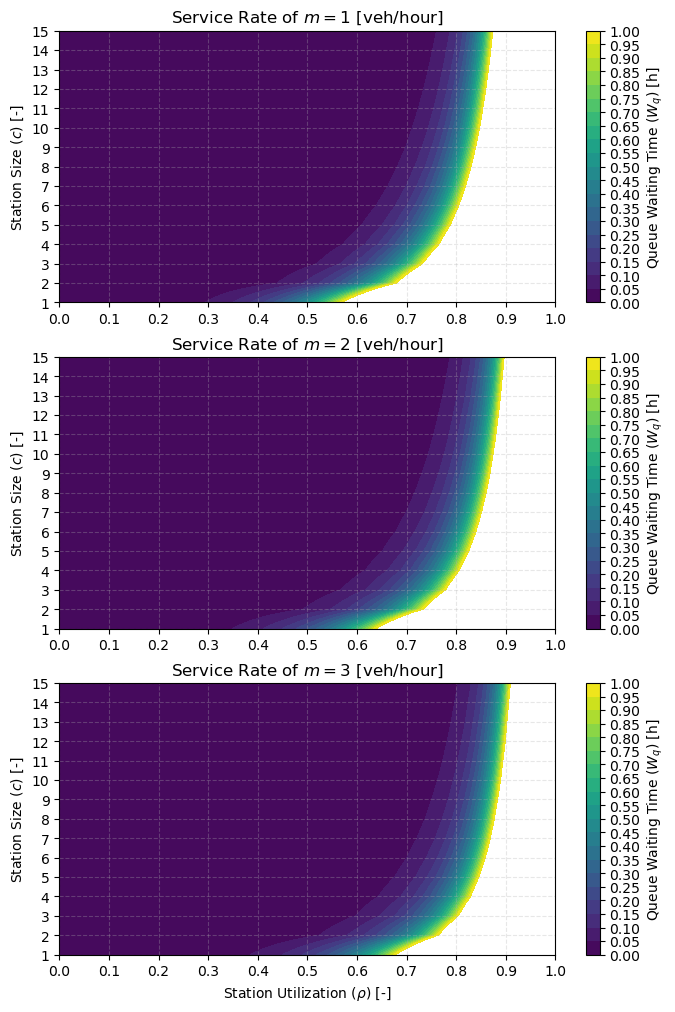

In [3]:
deep_reload(nice)

fig, ax = plt.subplots(3, 1, figsize = (8, 12), gridspec_kw = {'hspace': .2})

cmap = nice.plot.Colormap('viridis')

levels = np.linspace(0, 1, 21)

queue = nice.queue.Queue(m = 1)

x = np.linspace(0, 1, 100)
c = np.arange(1, 16, 1)

cg, xg = np.meshgrid(c, x, indexing = 'ij')

z = queue.interpolate(xg, cg)

kw = {
    'cmap': cmap.cmap,
    'levels': levels,
}
    
cb = ax[0].contourf(x, c, z, **kw)
ax[0].set_title(r'Service Rate of $m = 1$ [veh/hour]')

kw = {
    'label': r'Queue Waiting Time ($W_q$) [h]',
    'ticks': levels,
}

plt.colorbar(cb, ax = ax[0], **kw)

queue = nice.queue.Queue(m = 2)

cg, xg = np.meshgrid(c, x, indexing = 'ij')

z = queue.interpolate(xg, cg)

kw = {
    'cmap': cmap.cmap,
    'levels': levels,
}
    
cb = ax[1].contourf(x, c, z, **kw)

kw = {
    'label': r'Queue Waiting Time ($W_q$) [h]',
    'ticks': levels,
}

plt.colorbar(cb, ax = ax[1], **kw)
ax[1].set_title(r'Service Rate of $m = 2$ [veh/hour]')

queue = nice.queue.Queue(m = 3)

cg, xg = np.meshgrid(c, x, indexing = 'ij')

z = queue.interpolate(xg, cg)

kw = {
    'cmap': cmap.cmap,
    'levels': levels,
}
    
cb = ax[2].contourf(x, c, z, **kw)
ax[2].set_title(r'Service Rate of $m = 3$ [veh/hour]')
ax[2].set_xlabel(r'Station Utilization ($\rho$) [-]')

kw = {
    'label': r'Queue Waiting Time ($W_q$) [h]',
    'ticks': levels,
}

plt.colorbar(cb, ax = ax[2], **kw)

kw = {
    # 'xlabel': r'Station Utilization ($\rho$) [-]',
    'ylabel': r'Station Size ($c$) [-]',
    'xticks': np.linspace(0, 1, 11),
    'yticks': c,
}

_ = [ax.set(**kw) for ax in ax]

kw = {
    'ls': '--',
    'alpha': .3,
}

_ = [ax.grid(**kw) for ax in ax]

# fig.savefig('Paper/figs/w_q_rho_c_mult.png', bbox_inches = 'tight', dpi = 300)

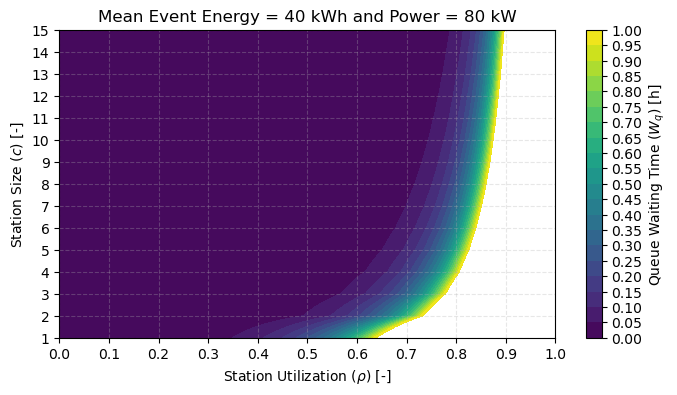

In [8]:
deep_reload(nice)

fig, ax = plt.subplots(1, 1, figsize = (8, 4))

cmap = nice.plot.Colormap('viridis')

m = 1 / (40 * 3.6e6 / 80e3)
queue = nice.queue.Queue(m = m, bounds = (0, 10 * 3600))
levels = np.linspace(0, 1, 21)
x = np.linspace(0, 1, 100)
c = np.arange(1, 16, 1)
cg, xg = np.meshgrid(c, x, indexing = 'ij')
z = queue.interpolate(xg, cg) / 3600

kw = {
    'cmap': cmap.cmap,
    'levels': levels,
}
    
cb = ax.contourf(x, c, z, **kw)
ax.set_title(r'Mean Event Energy = 40 kWh and Power = 80 kW')

kw = {
    'label': r'Queue Waiting Time ($W_q$) [h]',
    'ticks': levels,
}

plt.colorbar(cb, ax = ax, **kw)


kw = {
    'xlabel': r'Station Utilization ($\rho$) [-]',
    'ylabel': r'Station Size ($c$) [-]',
    'xticks': np.linspace(0, 1, 11),
    'yticks': c,
}

ax.set(**kw)

kw = {
    'ls': '--',
    'alpha': .3,
}

ax.grid(**kw)

fig.savefig('Formulation/figs/queue.png', bbox_inches = 'tight', dpi = 300)

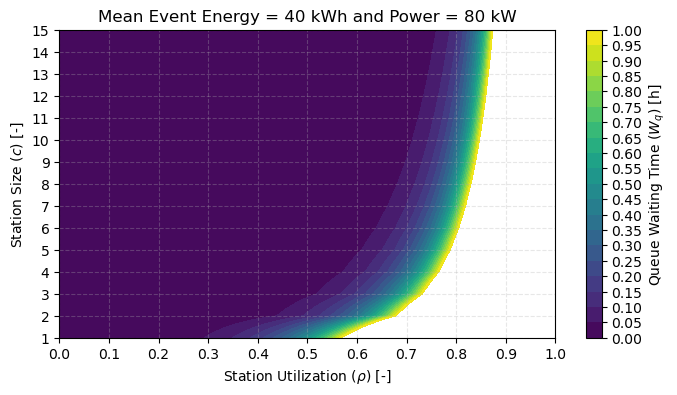

In [9]:
deep_reload(nice)

fig, ax = plt.subplots(1, 1, figsize = (8, 4))

cmap = nice.plot.Colormap('viridis')

m = 1 / (40 * 3.6e6 / 40e3)
queue = nice.queue.Queue(m = m, bounds = (0, 10 * 3600))
levels = np.linspace(0, 1, 21)
x = np.linspace(0, 1, 100)
c = np.arange(1, 16, 1)
cg, xg = np.meshgrid(c, x, indexing = 'ij')
z = queue.interpolate(xg, cg) / 3600

kw = {
    'cmap': cmap.cmap,
    'levels': levels,
}
    
cb = ax.contourf(x, c, z, **kw)
ax.set_title(r'Mean Event Energy = 40 kWh and Power = 80 kW')

kw = {
    'label': r'Queue Waiting Time ($W_q$) [h]',
    'ticks': levels,
}

plt.colorbar(cb, ax = ax, **kw)


kw = {
    'xlabel': r'Station Utilization ($\rho$) [-]',
    'ylabel': r'Station Size ($c$) [-]',
    'xticks': np.linspace(0, 1, 11),
    'yticks': c,
}

ax.set(**kw)

kw = {
    'ls': '--',
    'alpha': .3,
}

ax.grid(**kw)

# fig.savefig('Formulation/figs/queue.png', bbox_inches = 'tight', dpi = 300)

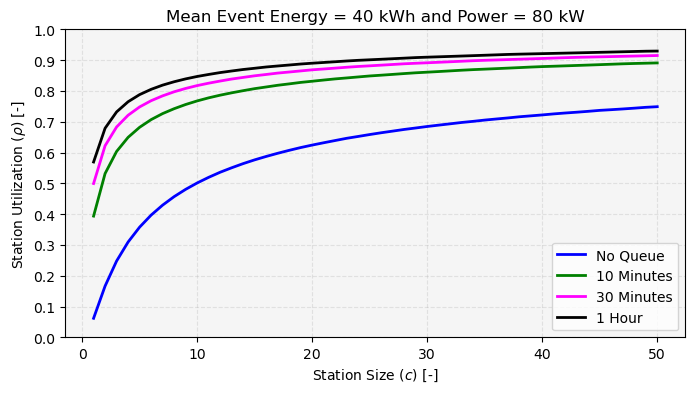

In [44]:
m = 1 / (40 * 3.6e6 / 40e3)
queue = nice.queue.Queue(m = m, bounds = (0, 10 * 3600))
levels = np.linspace(0, 1, 21)
x = np.linspace(0, 1, 100)
c = np.arange(1, 51, 1)
cg, xg = np.meshgrid(c, x, indexing = 'ij')
z = queue.interpolate(xg, cg)

fig, ax = plt.subplots(1, 1, figsize = (8, 4))

kw = {
    'lw': 2,
}

plt.plot(
    c, [np.interp(1, z[c - 1], x) for c in c],
    color = 'blue', label = 'No Queue', **kw
)
plt.plot(
    c, [np.interp(600, z[c - 1], x) for c in c], 
    color = 'green', label = '10 Minutes', **kw
)
plt.plot(
    c, [np.interp(1800, z[c - 1], x) for c in c],
    color = 'magenta', label = '30 Minutes', **kw
)
plt.plot(
    c, [np.interp(3600, z[c - 1], x) for c in c],
    color = 'black', label = '1 Hour', **kw
)

kw = {
    'title': 'Mean Event Energy = 40 kWh and Power = 80 kW',
    'xlabel': r'Station Size ($c$) [-]',
    'ylabel': r'Station Utilization ($\rho$) [-]',
    'yticks': np.linspace(0, 1, 11),
    'facecolor': 'whitesmoke',
}

ax.set(**kw)

kw = {
    'ls': '--',
    'alpha': .3,
}

ax.grid(**kw)

_ = ax.legend()